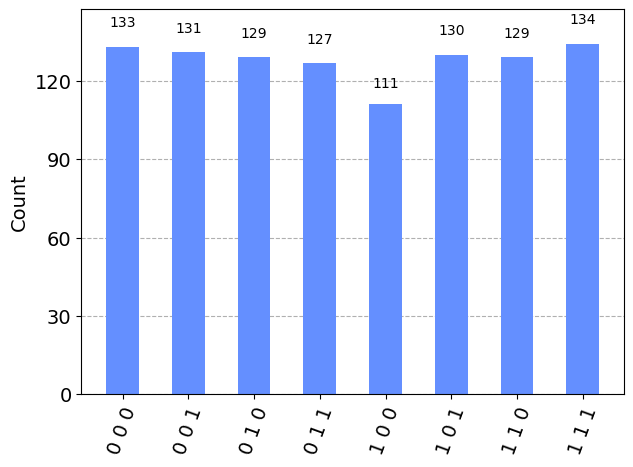

In [4]:
# Import libraries
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer, QuantumRegister, ClassicalRegister,  execute
from qiskit.visualization import plot_histogram, plot_bloch_multivector

# Create circuit
qr = QuantumRegister(3, name="q") # Quantum register with 3 qubits
crz = ClassicalRegister(1, name="crz") # Classical register for Z measurement
crx = ClassicalRegister(1, name="crx") # Classical register for X measurement
crb = ClassicalRegister(1, name="crb") # Classical register for Bob's result
qc = QuantumCircuit(qr, crz, crx, crb) # Quantum circuit

# Prepare initial state of qubit 0
psi = [1/np.sqrt(2), -1/np.sqrt(2)] # State vector for |-> state
qc.initialize(psi, 0) # Initialize qubit 0 with psi

# Create Bell pair between qubit 1 and 2
qc.h(1) # Apply Hadamard gate to qubit 1
qc.cx(1, 2) # Apply CNOT gate with qubit 1 as control and qubit 2 as target

# Apply Alice's gates to qubit 0 and 1
qc.cx(0, 1) # Apply CNOT gate with qubit 0 as control and qubit 1 as target
qc.h(0) # Apply Hadamard gate to qubit 0

# Measure qubit 0 and 1
qc.barrier() # Use barrier to separate steps
qc.measure(0, crz) # Measure Z basis of qubit 0 and store in crz
qc.measure(1, crx) # Measure X basis of qubit 1 and store in crx

# Apply Bob's gates to qubit 2
qc.barrier() # Use barrier to separate steps
qc.x(2).c_if(crx, 1) # Apply X gate to qubit 2 if crx is 1
qc.z(2).c_if(crz, 1) # Apply Z gate to qubit 2 if crz is 1

# Measure qubit 2
qc.measure(2, crb) # Measure Z basis of qubit 2 and store in crb

# Run circuit on simulator
simulator = Aer.get_backend('qasm_simulator') # Get simulator backend
qobj = assemble(qc) # Assemble circuit into a quantum object
result = execute(qc, backend= simulator).result() # Run quantum object and get result
counts = result.get_counts() # Get counts of measurement outcomes

# Plot results
plot_histogram(counts) # Plot histogram of counts
